# Airbnb Exploratory Visual Analysis

1. Import Libraries and Data
2. Correlations Matrix
3. Scatterplots: Price vs. Availability and Price vs. Host Listings
4. Pair Plot
5. Categorical Plot
6. Export

# 1. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.5.1'

In [3]:
#charts displayed without needing to call them
%matplotlib inline

In [4]:
# Define path
path = r'C:\Users\lizan\Desktop\Data Analytics\07-22 Airbnb Toronto Analysis'

In [5]:
# Import Listings data
listings = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','Listings_Clean.csv'))

In [6]:
# Import Calendar Data
cal = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','Calendar_Clean.pkl'))

In [7]:
# Import Combined Data
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','Listings_Calendar_Combined.pkl'))

In [8]:
df.columns

Index(['Unnamed: 0', 'listing_id', 'name', 'host_id', 'host_name',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price_x',
       'minimum_nights_x', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'date',
       'available', 'price_y', 'adjusted_price', 'minimum_nights_y',
       'maximum_nights', '_merge'],
      dtype='object')

# 2. Correlation Heatmap

In [9]:
# Create a sub set to compare price against number_of_reviews, availability_365, calculated_host_listing_count
sub = df[['price_x','number_of_reviews','availability_365','calculated_host_listings_count']]

In [10]:
sub

,price_x,number_of_reviews,availability_365,calculated_host_listings_count
0,469.0,7,0,1
1,469.0,7,0,1
2,469.0,7,0,1
3,469.0,7,0,1
4,469.0,7,0,1
...,...,...,...,...
5537412,108.0,57,81,1
5537413,108.0,57,81,1
5537414,108.0,57,81,1
5537415,108.0,57,81,1


In [11]:
# Create a correlation matrix
sub.corr()

,price_x,number_of_reviews,availability_365,calculated_host_listings_count
price_x,1.000000,-0.017866,0.076512,0.094937
number_of_reviews,-0.017866,1.000000,-0.015420,-0.064557
availability_365,0.076512,-0.015420,1.000000,0.041540
calculated_host_listings_count,0.094937,-0.064557,0.041540,1.000000


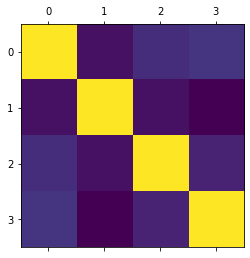

In [12]:
# Create a correlation heatmap

plt.matshow(sub.corr())
plt.show()

Text(0.5, 1.0, 'Price Correlation Matrix')

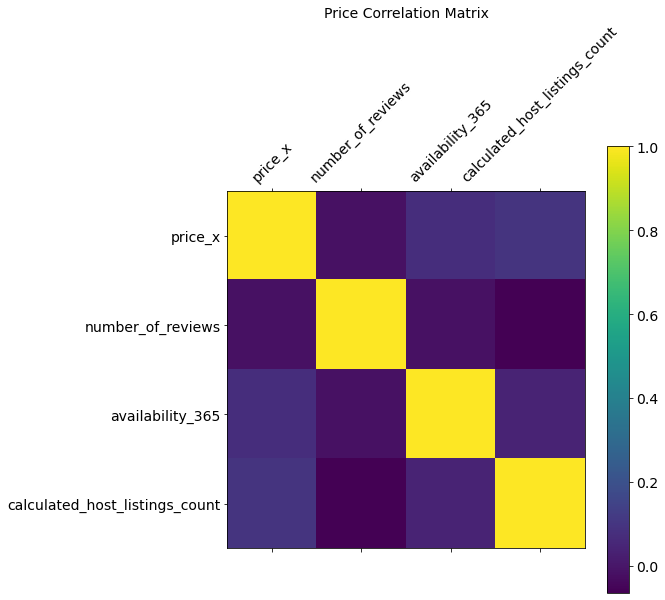

In [13]:
# Add labels, a legend and change the size of the heatmap

f = plt.figure(figsize=(8,8))
plt.matshow(sub.corr(), fignum=f.number)
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45)
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Price Correlation Matrix', fontsize=14)

The correlation heat map does not show any strong relationships between the varibales.  I was expecting price and number of reviews to have a stronger correlation.  I will plot scatterplots for price vs availability and price vs. count of host listings

# 3. Scatterplots

In [14]:
# Create a 70/30 sample
np.random.seed(4)
dev = np.random.rand(len(sub)) <= 0.7

In [15]:
# Define big and small sample sets
big = sub[dev]
small = sub[~dev]

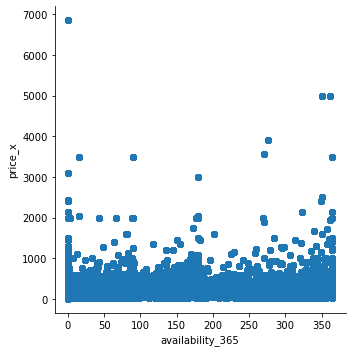

In [16]:
# Scatterplot showing the relationship between price and availability in a random 30% sample
sns.lmplot(x = 'availability_365', y = 'price_x', data = small)

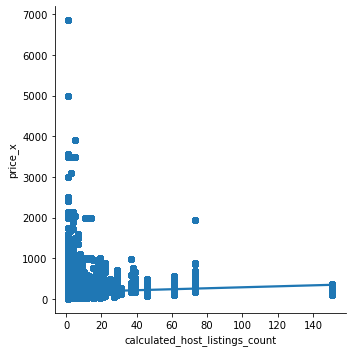

In [17]:
# Scatterplot showing the relationship between price and number of host listings in a random 30% sample
sns.lmplot(x = 'calculated_host_listings_count', y = 'price_x', data = small)

No real linear correlation can be seen in these scatterplots.  I may want to refine my data set to exclude some of the high value price outliers as they respresent a small portion and are skewing the visuals.

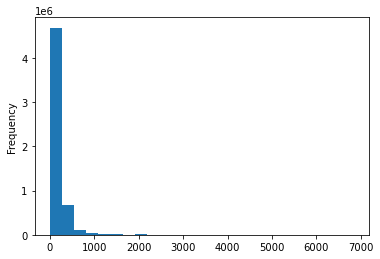

In [18]:
hist = df['price_x'].plot.hist(bins=25)

There are some extreme price outliers effecting the analysis.  I will create a subset for prices under $1000 and recreate he scatterplots

In [19]:
# Create a sub set of prices under $1,000
df_price = df[df['price_x'] < 1000]

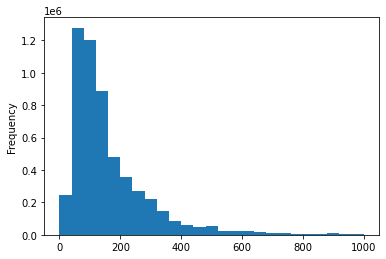

In [20]:
hist2 = df_price['price_x'].plot.hist(bins=25)

In [21]:
# Create a sub set to compare price against number_of_reviews, availability_365, calculated_host_listing_count
sub_price = df_price[['price_x','number_of_reviews','availability_365','calculated_host_listings_count']]

In [22]:
# Create a 70/30 sample
np.random.seed(4)
dev = np.random.rand(len(sub_price)) <= 0.7

In [23]:
# Define big and small sample sets
big = sub_price[dev]
small = sub_price[~dev]

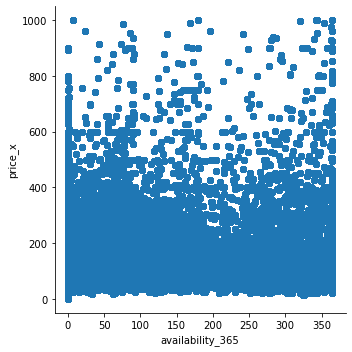

In [24]:
# Scatterplot showing the relationship between price and availability in a random 30% sample
sns.lmplot(x = 'availability_365', y = 'price_x', data = small)

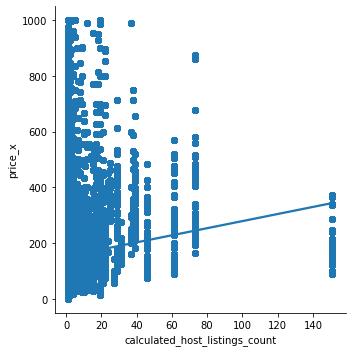

In [25]:
# Scatterplot showing the relationship between price and number of host listings in a random 30% sample
sns.lmplot(x = 'calculated_host_listings_count', y = 'price_x', data = small)

Even with the sub set of pricing uner $1000 there is still no apparent relationship.

# 4. Pair Plot

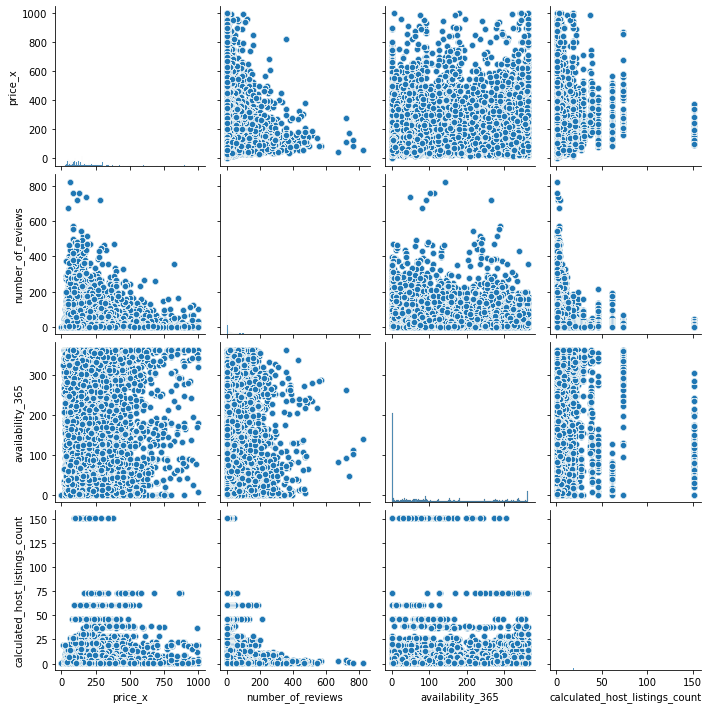

In [26]:
# create pair plor of the sub group
g = sns.pairplot(sub_price)

# 5. Categoroical Plot

<AxesSubplot:xlabel='price_x', ylabel='Count'>

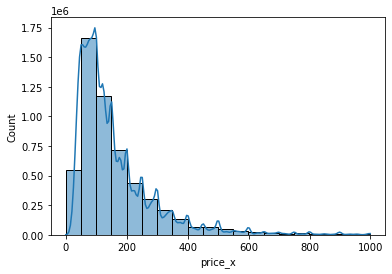

In [27]:
sns.histplot(sub_price['price_x'], bins = 20, kde = True)

In [28]:
#Price categories low less than 100 - mid range 100 - 200 - high over 200
df.loc[df['price_x'] < 100, 'price category'] = 'Low Price'

In [29]:
df.loc[(df['price_x'] >= 100) & (df['price_x'] <= 200), 'price category'] = 'Mid Price'

In [30]:
df.loc[df['price_x'] > 200, 'price category'] = 'High Price'

In [31]:
# Create a sub set of prices under $1,000
df_price_cat = df[df['price_x'] < 1000]

In [32]:
df['price category'].value_counts(dropna = False)

Low Price     2206426
Mid Price     1983776
High Price    1345025
NaN              2190
Name: price category, dtype: int64

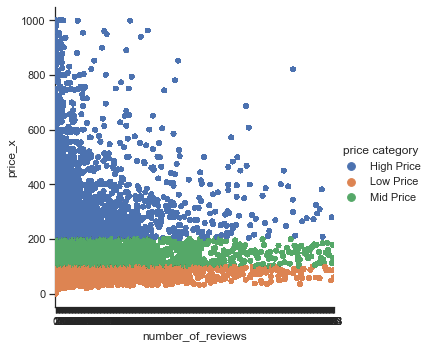

In [33]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="number_of_reviews", y="price_x", hue="price category", data=df_price_cat)

Overall I have found that number of reviews, availability and host's count of listings do not have a relationship to the price.  Next I would like to explore the effect neighbourhood and room type have on price.

# 6. Export Subset Data

In [34]:
df_price_cat.to_pickle(os.path.join(path, '02 Data','Prepared Data','Listings_Calendar_Subset_price.csv'))